In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [3]:
head = ['HK Time', 'Open', 'High', 'Low', 'Close', 'Volume']
data_2017 = pd.read_csv("F:\personal project\iq option trade\OUT_DAT_ASCII_AUDJPY_M1_2017.csv", delimiter=";", 
                        names=head)
data_2018 = pd.read_csv("F:\personal project\iq option trade\OUT_DAT_ASCII_AUDJPY_M1_2018.csv", delimiter=";",
                        names=head)
data_2019 = pd.read_csv("F:\personal project\iq option trade\OUT_DAT_ASCII_AUDJPY_M1_201901.csv", delimiter=";",
                        names=head)
train_data = data_2017.append(data_2018, ignore_index=True)
train_data = train_data.drop('Volume', 1)
data_2019 = data_2019.drop('Volume', 1)


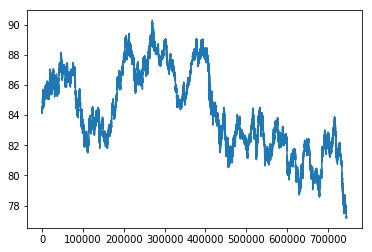

In [4]:
# Create return (open-close) normalized
train_data['Close'].plot()
train_data['return_next'] = train_data['Open'].shift(-1) - train_data['Close'].shift(-1)
return_range = train_data['return_next'].max() - train_data['return_next'].min()
train_data['return_next'] = train_data['return_next'] / return_range

train_data['return'] = train_data['Open'] - train_data['Close']
return_range = train_data['return'].max() - train_data['return'].min()
train_data['return'] = train_data['return'] / return_range

# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp
train_data['label'] = train_data['return_next'].apply(lambda x: 1 if x > 0.0 else 0)

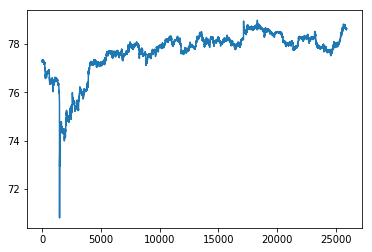

In [5]:
# Create return (open-close) normalized
data_2019['Close'].plot()
data_2019['return_next'] = data_2019['Open'].shift(-1) - data_2019['Close'].shift(-1)
return_range = data_2019['return_next'].max() - data_2019['return_next'].min()
data_2019['return_next'] = data_2019['return_next'] / return_range

data_2019['return'] = data_2019['Open'] - data_2019['Close']
return_range = data_2019['return'].max() - data_2019['return'].min()
data_2019['return'] = data_2019['return'] / return_range

# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp
data_2019['label'] = data_2019['return_next'].apply(lambda x: 1 if x > 0.0 else 0)

In [6]:
print(data_2019.shape)
data_2019.dropna(inplace=True)
data_2019['datetime'] = pd.to_datetime(data_2019['HK Time'])
data_2019 = data_2019.set_index(data_2019['datetime'])
data_2019.index.names = [None]
data_2019['year'] = data_2019.index.year
data_2019['month'] = data_2019.index.month
data_2019['day'] = data_2019.index.day
data_2019['hour'] = data_2019.index.hour
data_2019['minute'] = data_2019.index.minute
print(data_2019.shape, data_2019.columns)

(25900, 8)
(25899, 14) Index(['HK Time', 'Open', 'High', 'Low', 'Close', 'return_next', 'return',
       'label', 'datetime', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')


In [7]:
print(train_data.shape)
train_data.dropna(inplace=True)
train_data['datetime'] = pd.to_datetime(train_data['HK Time'])
train_data = train_data.set_index(train_data['datetime'])
train_data.index.names = [None]
train_data['year'] = train_data.index.year
train_data['month'] = train_data.index.month
train_data['day'] = train_data.index.day
train_data['hour'] = train_data.index.hour
train_data['minute'] = train_data.index.minute
print(train_data.shape, train_data.columns)

(745007, 8)


(745006, 14) Index(['HK Time', 'Open', 'High', 'Low', 'Close', 'return_next', 'return',
       'label', 'datetime', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')


In [8]:
df_test = data_2019
df_train = train_data

In [9]:
# Separate features and output

y_train = df_train['label']
x_train = df_train.loc[:, ['Open', 'High', 'Low', 'Close', 'return', 'year', 'month', 'day', 'hour', 'minute']]

y_test = df_test['label']
x_test = df_test.loc[:, ['Open', 'High', 'Low', 'Close', 'return', 'year', 'month', 'day', 'hour', 'minute']]


In [10]:
print(x_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == 0)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

(25899, 10)
(25899,)
% of Class0 : 0.521371 y_test
% of Class1 : 0.478629 y_test


In [11]:
print(x_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(745006, 10)
(745006,)
% of Class0 : 0.525080 y_train
% of Class1 : 0.474920 y_train


In [12]:
# Define SVM Classifier Model and fit
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=10.0, max_iter=20, verbose=1)
svm.fit(x_train, y_train)
accuracy = svm.score(x_train, y_train)
print('Train Accuracy: %f' % accuracy)


[LibSVM]

C:\Users\tim\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Train Accuracy: 0.474922


In [ ]:
# Put in test data
df_trade = x_test.copy()
df_trade['label'] = y_test

In [ ]:
# Predict GBC with test data
pred = svm.predict(x_test)
df_trade['pred'] = pred
df_trade['won'] = df_trade['label'] == df_trade['pred']
df_trade.head(10)
print(df_trade[df_trade['won'] == True]['won'].count()/df_trade['won'].count())
